# Geometry & Setup Diagram

This notebook loads the configuration and initial conditions, computes the lab-frame magnetic field and body magnetic moment vectors, and renders a 3D diagram.

PermissionError: [Errno 13] Permission denied: 'results/geometry_diagram.png'

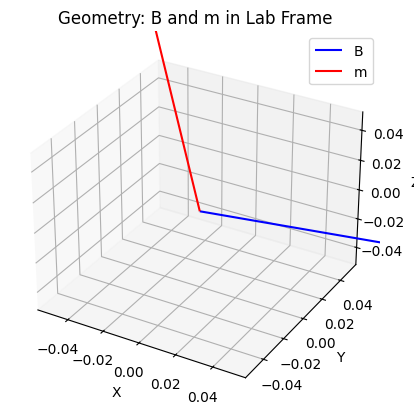

In [1]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# compute project root as “one level above this notebook”
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))


# Ensure results directory exists
os.makedirs('results', exist_ok=True)

# Load configuration parameters
with open('config.json') as f:
    params = json.load(f)
mB = params['mB']
omega = params['omega']
gamma = params['gamma']

# Load initial conditions
ic = np.load('initial_conditions.npz')
theta0 = ic['theta0']
phi0 = ic['phi0']
psi0 = ic['psi0']

# Compute lab-frame magnetic field at t=0
t0 = 0.0
Bx = mB * np.cos(omega*t0) * np.cos(gamma)
By = mB * np.sin(omega*t0) * np.cos(gamma)
Bz = mB * np.sin(gamma)

# Compute body magnetic moment in lab frame via Euler angles
Rz_phi = np.array([
    [np.cos(phi0), -np.sin(phi0), 0],
    [np.sin(phi0),  np.cos(phi0), 0],
    [0,            0,             1]
])
Rx_theta = np.array([
    [1, 0, 0],
    [0, np.cos(theta0), -np.sin(theta0)],
    [0, np.sin(theta0),  np.cos(theta0)]
])
Rz_psi = np.array([
    [np.cos(psi0), -np.sin(psi0), 0],
    [np.sin(psi0),  np.cos(psi0), 0],
    [0,            0,             1]
])
R = Rz_phi @ Rx_theta @ Rz_psi
m_body = np.array([0,0,1])
m_lab = R @ m_body
mx, my, mz = m_lab

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0, Bx, By, Bz, color='blue', length=1, normalize=True, label='B')
ax.quiver(0,0,0, mx, my, mz, color='red', length=1, normalize=True, label='m')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.legend()
plt.title('Geometry: B and m in Lab Frame')
plt.savefig('results/geometry_diagram.png')
print('✔ Saved results/geometry_diagram.png')
